<a href="https://colab.research.google.com/github/ariel-hedvat/AdvancedMLDLCourseAssignments/blob/main/finalProject/Recommendation_System_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1><font size=6> Music Recommendation System - Final Project</font></h1>

  <u>Group members:</u><br>
  - Ariel Hedvat<br>
  - Shiraz Israeli<br>
  - Yuval Bakirov<br>
  - Eitan Bakirov

<br>

</div>

# Background/Introduction

Finding the perfect song to listen to can feel like a challenging quest.<br> This is where recommendation systems come in, using data science to help us discover new music that aligns with our tastes and preferences.

A recommendation system is a tool, that utilizes Big Data to understand user preferences and behaviors. <br> By analyzing factors like listening history and genre preferences, these systems suggest songs and artists that match an individual's tastes. And enhances the music discovery process, saving users time and effort while introducing them to new music they're likely to enjoy.


# Main Objective<br>

The objective of our project is to build a recommendation system that can suggest the top 10 songs to a user, <br> based on the likelihood that the user will enjoy those songs, having the users' musical preferences, we will use and test a few models, <br> and finally after evaluating and comparing between the models, we aim to create a system that enriches their music listening experience.


# Data

The Taste Profile Subset, provided by the Echo Nest as a component of the Million Song Dataset, comprises two files. <br> The 1st file includes song details such as song ID, title, release information, artist name, and release year.  <br> The 2nd file contains user IDs, song IDs, and the corresponding play counts by users.

`song_data.rar` - <br>

**song_id** - A unique id given to every song

**title** - Title of the song

**Release** - Name of the released album

**Artist_name** - Name of the artist

**year** - Year of release

<br>

`triplets_file.rar` - <br>

**user_id** - A unique id given to the user

**song_id** - A unique id given to the song

**listen_count** - Number of times the song was played

<div class="markdown-google-sans">
  <h1><font size=5>Table of Contents</font></h1>

>[Background/Introduction](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=2PTur39mv9rt)

>[Main Objective](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=kaFLNJh5gnu7)

>[Data](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=6KQAH9j-qoZw)

>[Import Libraries](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=-_VBJ0JlYLKI)

>[Loading the data](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=kXwOL606ZfUN)

>[Handling the data](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=10dFieGliGFn)

>>[Data cleaning](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=i1NGznkkiL5J)

>>[Merging the data](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=HGCZ7ah8iOMa)

>[Exploratory Data Analysis](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=Wm5QD4lUigH8)

>[Preprocessing](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=8iVqCeAMimBE)

>[Full function section](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=y_4W_frl0COw)

>>[Splitting the data](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=m5SPLS-Ujixp)

>[Recommendation system workflow](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=ZkALY4u6kidY)

>[Algorithms and Models analysis](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=zHwULddKlZkf)

>>[Rank-based](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=T2_JBRavnciT)

>>[Collaborative-filtering](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=uZX1s5honcYg)

>>>[Similarity/Neighborhood-based](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=C-AdyyD6ncFC)

>>>[Model-based](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=6yDQucirnlkk)

>>[Cluster-based](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=ABABIeyTn0F5)

>>[Content-based](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=VrodWBIBn197)

>[Evaluation metrics](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=5lX4C4NzlmOK)

>[Showing predictions](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=taheIRbMoCLN)

>[Comparing the models](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=HJLFpdHpoRGe)

>[Final thoughts](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=rzu6n94-onDL)



#  Import Libraries

In [1]:
!pip install rarfile

In [2]:
# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

import rarfile
from io import BytesIO
import requests

# Custom colors #TODO TO CHANGING THAT
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m'

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
song_data_rar_url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/finalProject/Data/song_data.rar'
count_data_rar_url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/finalProject/Data/triplets_file.rar'

In [4]:
# Download the RAR files
song_data_rar_response = requests.get(song_data_rar_url)
count_data_rar_response = requests.get(count_data_rar_url)

In [5]:
def extract_csv_from_rar(rar_content):
    # Create a RarFile object from the content
    with rarfile.RarFile(BytesIO(rar_content), 'r') as rar_file:
        # Get list of files in the RAR archive
        file_list = rar_file.namelist()

        # Initialize empty DataFrames
        df = pd.DataFrame()

        # Iterate through each file in the archive
        for file_name in file_list:
            # Check if the file is a CSV file
            if file_name.endswith('.csv'):
                print(file_name)
                # Extract the CSV file and read it into a DataFrame
                with rar_file.open(file_name) as csv_file:
                    df = pd.read_csv(csv_file)

    return df

In [6]:
if song_data_rar_response.ok and count_data_rar_response.ok:
    # Extract content from the responses
    song_data_rar_content = song_data_rar_response.content
    count_data_rar_content = count_data_rar_response.content

    # Extract CSV files from RAR archives and convert to DataFrames
    song_df = extract_csv_from_rar(song_data_rar_content)
    count_df = extract_csv_from_rar(count_data_rar_content)
else:
  print("Error accessing the rar files, Try Again!")

song_data.csv
triplets_file.csv


In [7]:
song_df

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [8]:
count_df

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


# Handling the data

Count_df dataset information :

In [9]:
# Count_df info
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [10]:
# Shape of count_df
count_df.shape

(2000000, 3)

In [11]:
# Checking for missing values in count_df
count_df.isna().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

In [12]:
#Number of unique values in each column of count_df
count_df.nunique()

user_id         76353
song_id         10000
listen_count      295
dtype: int64

And same for Song_df dataset information :

In [13]:
# Song_df info
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [14]:
# Shape of song_df
song_df.shape

(1000000, 5)

In [15]:
# Checking for missing values in song_df
song_df.isna().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [16]:
#Number of unique values in each column of song_df
song_df.nunique()

song_id        999056
title          702428
release        149288
artist_name     72665
year               90
dtype: int64

Insights from what we saw above about each of the data sets : <br>  #TODO
Count_df : <br>
Song_df : <br>
- There are 15 differnet songs without a title .



## Data cleaning

## Merging the data

In [17]:
# Merge count_df and song_df by song_id
combined_df = count_df.merge(song_df.drop_duplicates('song_id'), how='left', on='song_id').drop_duplicates()

In [18]:
combined_df

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


# Exploratory Data Analysis

#TODO
IMPORTANT
PLEASE NOTE !!! RUN THE EDA AFTER THE WHOLE PAGE )AFTER PRE-PROCESSING(

In [19]:
df = combined_df

In [20]:
df

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [21]:
# Shape of the data
df.shape

(2000000, 7)

In [22]:
#Checking Data Types
df.dtypes


user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

In [23]:
#Summary Statistics (of Numeric features)
df.describe()

,listen_count,year
count,2.000000e+06,2.000000e+06
mean,3.045485e+00,1.628645e+03
std,6.579720e+00,7.787283e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.984000e+03
50%,1.000000e+00,2.002000e+03
75%,3.000000e+00,2.007000e+03
max,2.213000e+03,2.010000e+03


In [24]:
#Missing Values
df.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

In [25]:
#Unique Values
df.nunique()

user_id         76353
song_id         10000
listen_count      295
title            9567
release          5388
artist_name      3375
year               58
dtype: int64

Top 10 Songs:
title
You're The One                                                         54915
Undo                                                                   49253
Revelry                                                                41418
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    31153
Sehr kosmisch                                                          31036
Dog Days Are Over (Radio Edit)                                         26663
Secrets                                                                22100
Canada                                                                 21019
Invalid                                                                19645
Ain't Misbehavin                                                       18309
Name: listen_count, dtype: int64


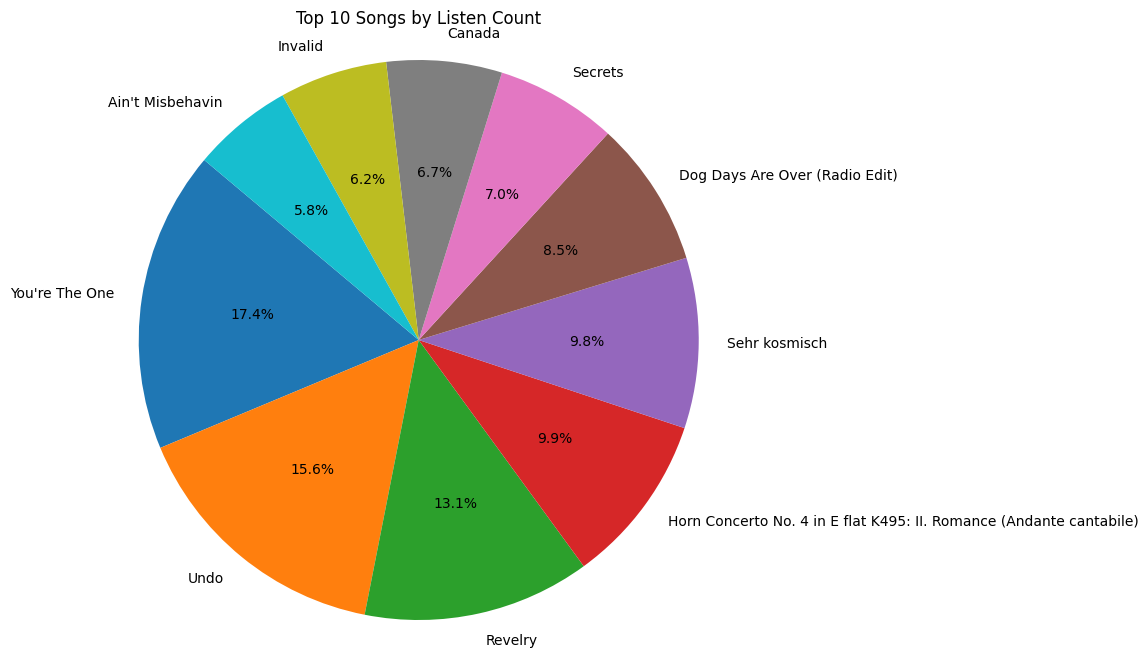

In [26]:
def top_songs(df, n=10):
    # Calculate the total listen counts for each song
    listen_counts = df.groupby('title')['listen_count'].sum()

    # Sort the songs by listen counts in descending order
    listen_counts = listen_counts.sort_values(ascending=False)

    # The top 10 songs
    top_songs = listen_counts.head(n)

    # Printing the top songs
    print("Top", n, "Songs:")
    print(top_songs)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.pie(top_songs, labels=top_songs.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Top {n} Songs by Listen Count')
    plt.show()

top_songs(df)


artist_name
Coldplay                  70138
Kings Of Leon             68570
Florence + The Machine    60066
Dwight Yoakam             54136
Björk                     53814
The Black Keys            52220
Jack Johnson              44083
Justin Bieber             41645
OneRepublic               40981
Train                     39279
Name: listen_count, dtype: int64


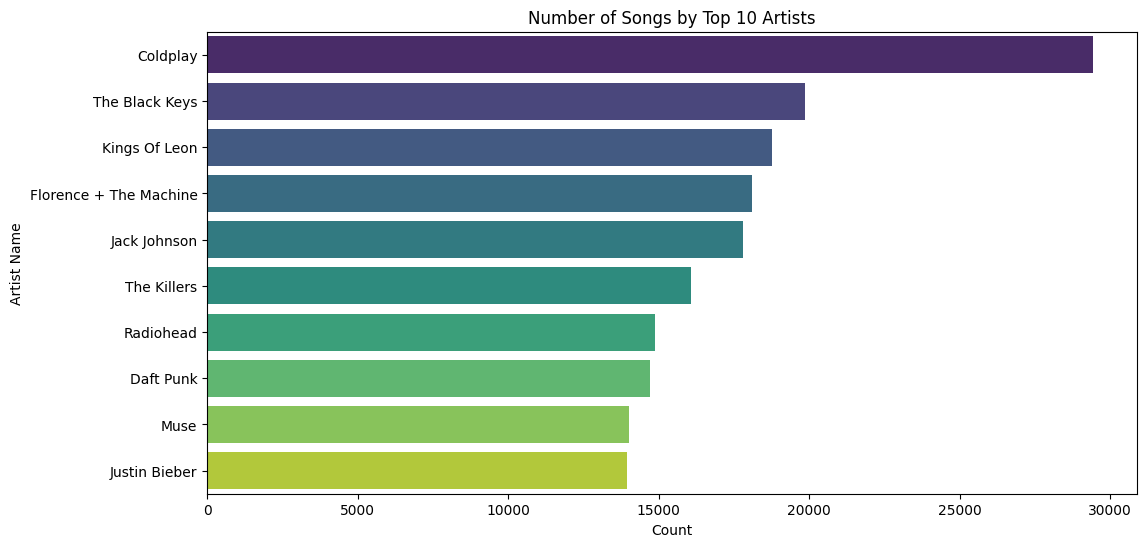

In [27]:
#Top Artists
#TODO - NOT SAME VALUES MAYBE CHOSE ONE

def top_artists(df, n=10):
    return df.groupby('artist_name')['listen_count'].sum().sort_values(ascending=False).head(n)

# Plotting the Top Artists
def plot_top_artists(df):
    print(top_artists(df))
    plt.figure(figsize=(12, 6))
    sns.countplot(y='artist_name', data=df, palette='viridis', order=df['artist_name'].value_counts().index[:10])
    plt.title('Number of Songs by Top 10 Artists')
    plt.xlabel('Count')
    plt.ylabel('Artist Name')
    plt.show()

plot_top_artists(df)

In [28]:
#Top Users
# Top 10 useres that listen to music the most .
def top_users(df, n=10):
    return df.groupby('user_id')['listen_count'].sum().sort_values(ascending=False).head(n)

top_users(df)

user_id
4be305e02f4e72dad1b8ac78e630403543bab994    4426
6d625c6557df84b60d90426c0116138b617b9449    3482
d13609d62db6df876d3cc388225478618bb7b912    2686
0b19fe0fad7ca85693846f7dad047c449784647e    2679
283882c3d18ff2ad0e17124002ec02b847d06e9a    2306
083a2a59603a605275107c00812a811526c2a0af    2142
6a944bfe30ae8d6b873139e8305ae131f1607d5f    2062
5ea608df0357ec4fda191cb9316fe8e6e65e3777    2032
9c859962257112ad523f1d3c121d35191daa6d2b    2032
2231cb435771a1a621ec44e95cdd28b81fad3288    2019
Name: listen_count, dtype: int64

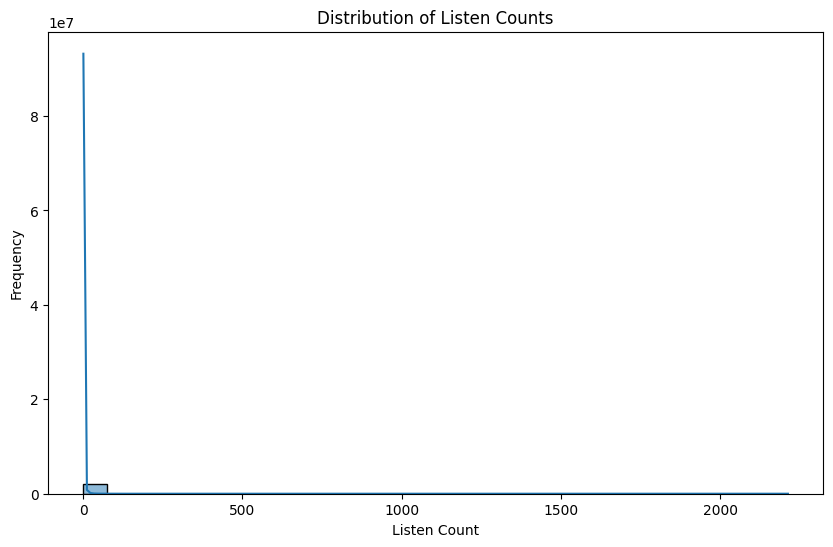

In [29]:
def plot_listen_count_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['listen_count'], bins=30, kde=True)
    plt.title('Distribution of Listen Counts')
    plt.xlabel('Listen Count')
    plt.ylabel('Frequency')
    plt.show()

plot_listen_count_distribution(df)
#TODO - DIFFERENT WE RUNNING IT BEFORE AND AFTER THE PRE-PROCCESSING


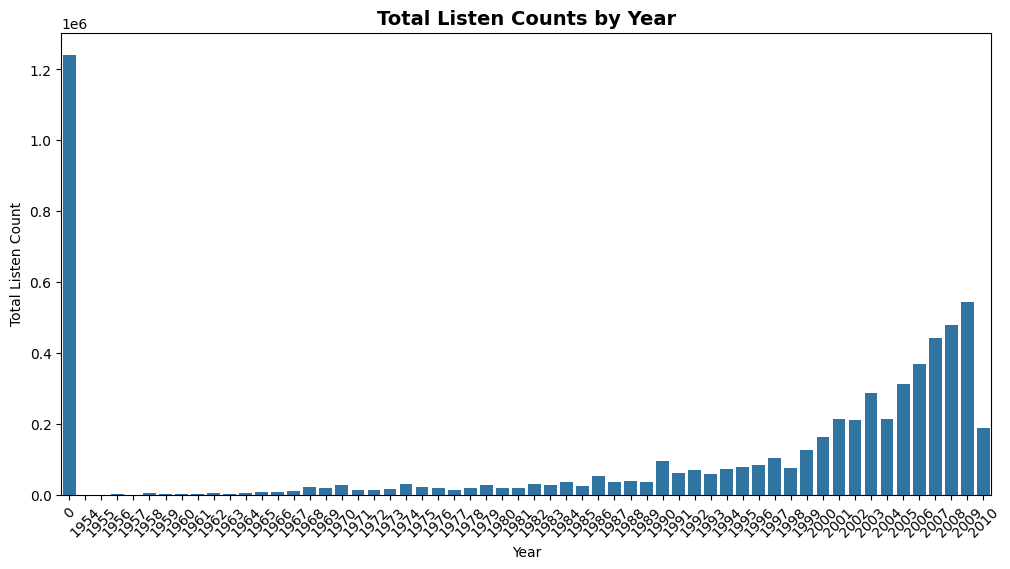

In [30]:
#Bar Plot of Listen Counts by Year
def plot_listen_counts_by_year(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='year', y='listen_count', data=df, estimator=sum, ci=None)
    plt.xticks(rotation=45)
    plt.title('Total Listen Counts by Year', weight="bold", size=14)
    plt.xlabel('Year')
    plt.ylabel('Total Listen Count')
    plt.show()

plot_listen_counts_by_year(df)

In [31]:
# #TODO - DECIDE WHICH ONE FOR YEAR PLOTTING

# dfy = df.copy()

# # Drop rows where 'year' is 0
# dfy = dfy[dfy['year'] != 0]


# # Convert 'year' to datetime format
# dfy['year'] = pd.to_datetime(dfy['year'], format='%Y')

# # Set 'year' as the index
# dfy.set_index('year', inplace=True)

# # Group by year and calculate the total listen counts
# listen_counts_by_year = dfy.resample('Y')['listen_count'].sum()

# # Plotting time series of listen counts
# plt.figure(figsize=(12, 6))
# listen_counts_by_year.plot(marker='o', color='b')
# plt.xlabel('Year')
# plt.ylabel('Total Listen Counts')
# plt.title('Total Listen Counts Over Time')
# plt.grid(True)
# plt.show()


TODO
NEED TO HANGLE YEAR = 0

Top Releases by Total Listen Counts:
release
If There Was A Way                  54136
Vespertine Live                     49652
Only By The Night                   46811
Greatest Hits                       45360
My Worlds                           38094
Waking Up                           33902
Now That's What I Call Music! 75    32380
Save Me_ San Francisco              31865
Mozart - Eine kleine Nachtmusik     31153
Musik von Harmonia                  31036
Name: listen_count, dtype: int64


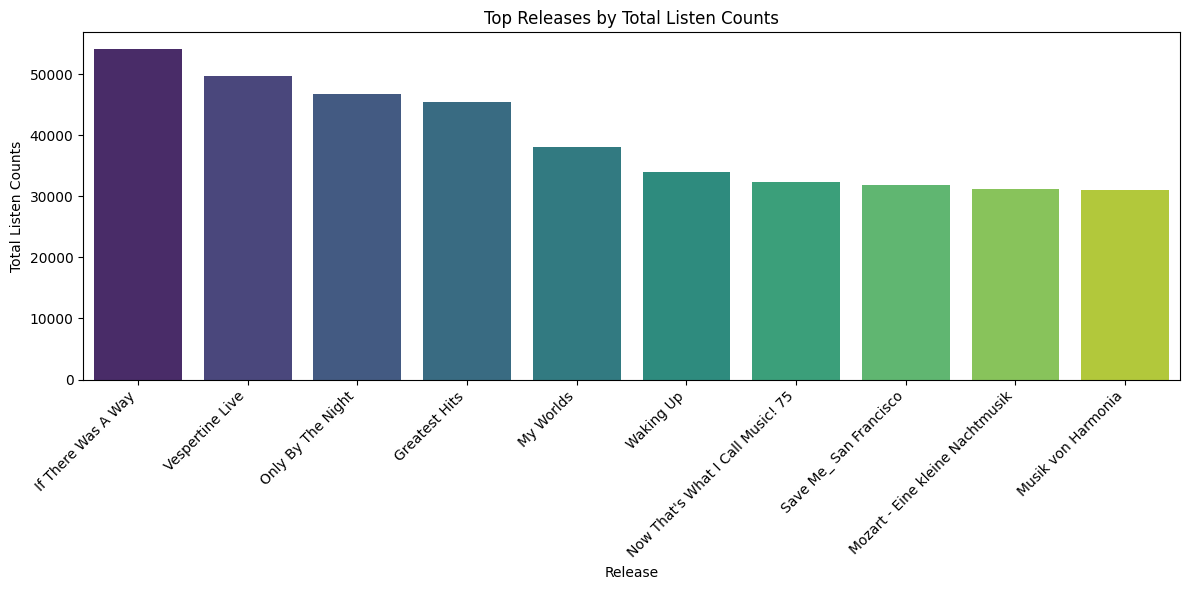


Top Releases by Average Listen Counts:
release
Spun                               18.158228
Stress related / Live and learn    16.037500
A Taste Of Extreme Divinity        15.976000
All I Can Provide                  15.171756
The Futureheads                    14.646341
Happy In Grey                      13.808219
Machine Punk Music                 13.504348
Blues On The South Side            13.213235
50 Hronia Rebetiko Tragoudi        13.182540
Speak Life                         11.755319
Name: listen_count, dtype: float64


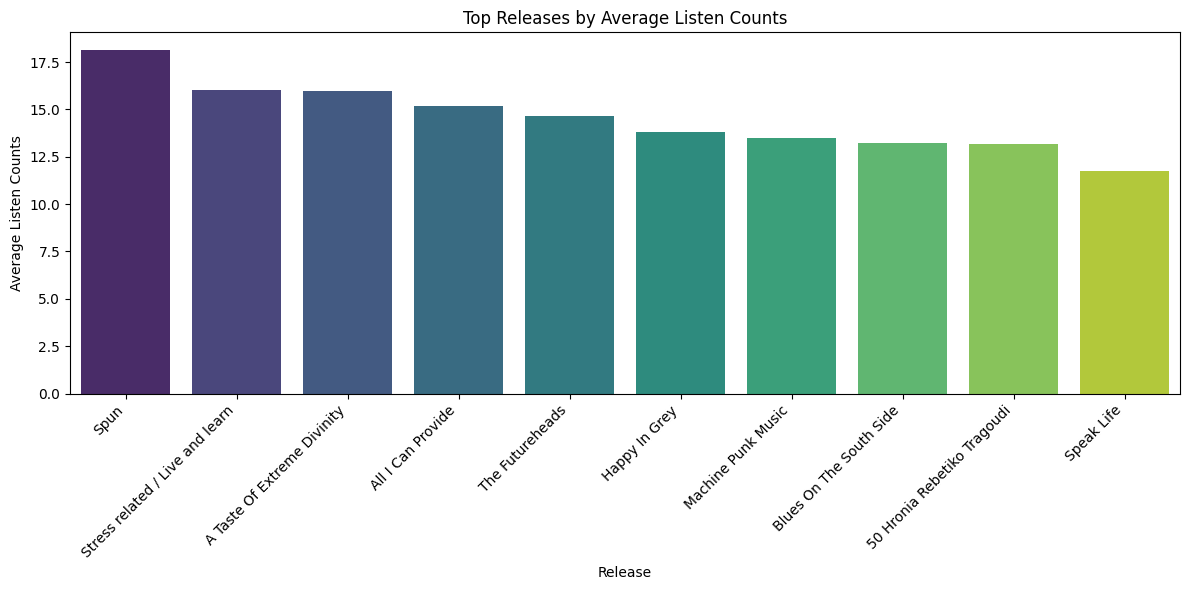

In [32]:
def release_insights(df):
    # Calculate total listen counts per release
    total_listen_counts = df.groupby('release')['listen_count'].sum()
    # Calculate average listen counts per release
    avg_listen_counts = df.groupby('release')['listen_count'].mean()

    # Sort releases by total listen counts in descending order
    total_listen_counts = total_listen_counts.sort_values(ascending=False)

    # Print top releases with total listen counts
    print("Top Releases by Total Listen Counts:")
    print(total_listen_counts.head(10))

    # Plotting total listen counts
    plt.figure(figsize=(12, 6))
    sns.barplot(x=total_listen_counts.head(10).index, y=total_listen_counts.head(10).values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Release')
    plt.ylabel('Total Listen Counts')
    plt.title('Top Releases by Total Listen Counts')
    plt.tight_layout()
    plt.show()

    # Print top releases with average listen counts
    print("\nTop Releases by Average Listen Counts:")
    print(avg_listen_counts.nlargest(10))

    # Plotting average listen counts
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_listen_counts.nlargest(10).index, y=avg_listen_counts.nlargest(10).values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Release')
    plt.ylabel('Average Listen Counts')
    plt.title('Top Releases by Average Listen Counts')
    plt.tight_layout()
    plt.show()

# Usage
release_insights(df)


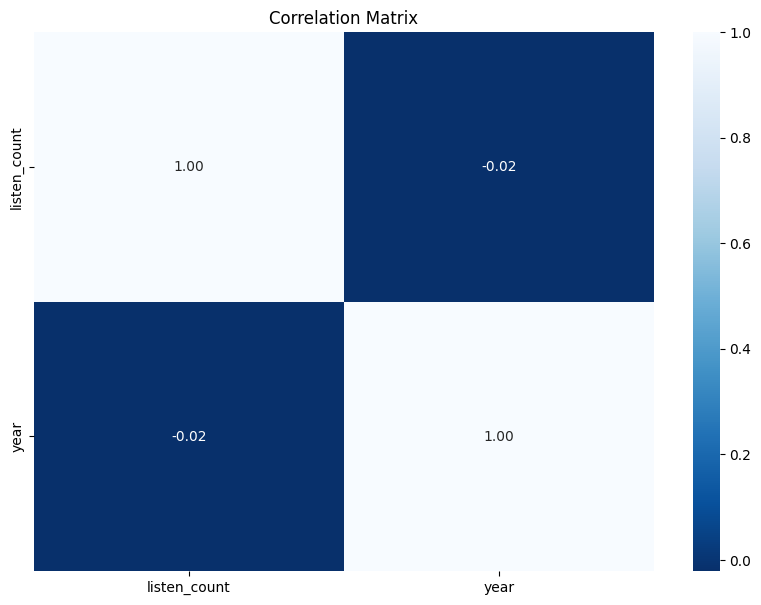

In [33]:
def plot_feature_correlation(df):
    # Calculate the correlation matrix
    corr = df.corr()

    # Plot the heatmap with pastel colors
    plt.figure(figsize=(10, 7))
    sns.heatmap(corr, annot=True, cmap='Blues_r', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

plot_feature_correlation(df)
#TODO - to see what ////


Looks like there is no coreelation between any of the features, as it is less less 0.1...

# Preprocessing

In [34]:
# Apply a label-encoding for user_id and song_id attributes.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_df['user_id'] = label_encoder.fit_transform(combined_df['user_id'])
combined_df['song_id'] = label_encoder.fit_transform(combined_df['song_id'])

In [35]:
combined_df

,user_id,song_id,listen_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,64590,3660,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,64590,3736,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,64590,3744,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,64590,3893,1,Up,My Worlds,Justin Bieber,2010


In [36]:
# Group data on user_id, and count how many different songs each user has listened to.
group_users = combined_df.groupby('user_id').count().reset_index(names=['user_id'])
# Drop the users that have listened to less than 90 songs.
combined_df = combined_df.loc[~combined_df['user_id'].isin(group_users[group_users['listen_count'] < 90]['user_id'])]

In [37]:
# Group data on song_id, and count how many different users listened to each song.
group_songs = combined_df.groupby('song_id').count().reset_index(names=['song_id'])
# Drop the songs that have been listened to by less than 120 users.
combined_df = combined_df.loc[~combined_df['song_id'].isin(group_songs[group_songs['listen_count'] < 120]['song_id'])]

In [38]:
# Drop records with play_count more than(>) 5
combined_df = combined_df[combined_df.listen_count <= 5]

In [39]:
# Dropping all the records that have the `year = 0`.
df_final = combined_df[combined_df['year'] > 0]

# Full function section


https://github.com/rctruta/music_recommendation_system/blob/main/music_recommendation_system_final_submission.ipynb

In [40]:
# ========== Function precision_recall_at_k ==========
def precision_recall_at_k(model, k=10, threshold=1, verbose=True):
    """
    A function to calculate rmse, precision, recall, and F1_score, at k.
    This function is adapted from the one in the Surprise library.
    Params:
      model: the model to be used for predictions
      k: the number of relevant items to be considered (top k)
      threshold: the minimum value that a rating should satisfy to be relevant
      verbose: Bool, determines the way to display the results
    Returns:
      [rmse, recall, precision, f1_score]
        verbose=True: displays the list containing the 4 metrics
        verbose=False: returns a list with the 4 metrics.
          This is useful when experimenting with various values for (k, threshold).

    """

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data.
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user play counts by estimated value.
        user_ratings.sort(key=lambda x : x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Here, we set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Here, we set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    rmse = round(accuracy.rmse(predictions, verbose=False), 3)

    f1_score = round((2 * precision * recall) / (precision + recall), 3)

    if verbose:
        return print(clr.S+'rmse: {}, recall: {}, precision: {}, f1_score: {}'.format(rmse, recall, precision, f1_score)+clr.E)
    else:
        return [rmse, recall, precision, f1_score]

# ========== Function get_songs_played_by_user ==========
def get_songs_played_by_user(user, data):
    """
    Returns all the songs played by a user.
    Params:
        user: user_id
        data: the dataframe with the data
    Returns:
        An array with all the song_ids of the songs user_id listened to.
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='song_id', and change the return condition.
    """
    return data[data['user_id'] == user]['song_id'].unique()

# ========== Function get_songs_not_played_by_user ==========
def get_songs_not_played_by_user(user, data):
    """
    Returns all the songs not played by a user.
    Params:
        user: user_id
        data: the dataframe with the data
    Returns:
        An array with all the song_ids of the songs user_id had not listened to.
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='song_id', and change the return condition.
    """
    return data[~data['song_id'].isin(get_songs_played_by_user(user))]['song_id'].unique()

# ========== Function played_count_predict ==========
def play_count_predict(algo, user, song, r_ui=None):
    """
    A function that uses algo, to predict the rating for a song, by user.
    Args:
        algo: the algorithm used for prediction
        user: the user_id
        song: the song_id
        r_ui: play_count, if it exists
    Returns:
        A formatted display of the results of the prediction method.
    """

    r_ui = algo.predict(user, song, r_ui=r_ui).r_ui
    est = round(algo.predict(user, song).est, 2)
    return print(clr.S+'Displaying the predictions for user {} and song {}.\n\n- Real prediction: {},\n- Estimated prediction: {}.'
                 .format(user, song, r_ui, est)+clr.E)

# ========== Function display_best_params ==========
def display_best_params(model):
    """
    Function to display the best RMSE and values of the hyper-parameters, following a Grid/Randomized search.
    Args:
        model: the model used
    Returns:
    """
    print(clr.S+'RMSE of the best option: {}'.format(round(model.best_score['rmse'], 3))+clr.E)
    print(clr.S+'The hyperparameters of the best option: {}'.format(model.best_params['rmse'])+clr.E)

# ========== Function get_recommendations ==========
def get_recommendations(data, user, n, algo):
    """
    Function to get the top_n recommendations for a user.
    Params:
        data: the DataFrame with user-item information
        user: the ID of the user for which we generate recommendations
        n: the upper limit of the recommendations we are making
        algo: the algorithm used for recommendations
    Returns:
        A list of the top_n items recommended to the user.
    """
    # Creating an empty list to store the recommended song IDs.
    recommendations = []

    # Creating an user-item interactions matrix.
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those song IDs that the user_id has not listened to yet.
    non_listened_songs = user_item_interactions_matrix.loc[user][user_item_interactions_matrix.loc[user].isnull()].index.tolist()

    # Looping through each of the song IDs that user_id has not listened to yet.
    for item_id in non_listened_songs:

        # Predicting the play_count for those songs not listened to by this user.
        est = round(algo.predict(user, item_id).est, 2)

        # Appending the predicted play_counts.
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order.
    recommendations.sort(key = lambda x: x[1], reverse=True)

    # Returing top n highest predicted play_counts for this user.
    return recommendations[:n]

# ========== Function get_users_who_played_song ==========
def get_users_who_played_song(song, data):
    """
    data=df_final
    Returns all the users who listened to the song.
    Params:
        song: song_id
        data: the dataframe with the data
    Returns:
        An array with all the user_ids of the users who listened to the song.
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='user_id', and change the return condition.
    """
    return data[data['song_id'] == song]['user_id'].unique()

# ========== Function get_users_who_did_not_played_song ==========
def get_users_who_did_not_played_song(song, data):
    """
    Returns all the users who did not listened to the song.
    Params:
        song: song_id
        data: the dataframe with the data
    Returns:
        An array with all the user_ids of the users who had not listened to the song.
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='user_id', and change the return condition.
    """
    return data[~data['user_id'].isin(get_users_who_played_song(song, data=data))]['user_id'].unique()

# ========== Function ==========

## Splitting the data

# Recommendation system workflow

https://github.com/rctruta/music_recommendation_system/blob/main/music_recommendation_system_final_submission.ipynb

# Algorithms and Models analysis

We will use a few diffrent approach, trying a few models for Recoomendation System and then will compare between them.
 The models we will use :    
 1. Rank - Based (Popularity) Model  
 2.  

https://github.com/rctruta/music_recommendation_system/blob/main/music_recommendation_system_final_submission.ipynb

## Rank-based (Popularity)

In this model, songs that are frequently listened to or have high listen counts are ranked higher and recommended to users.

This model does not take into account the individual preferences or tastes of users. Instead, it focuses on recommending songs that are popular among a large group of users.


In [41]:
# Calculating the average of listen_count :
avg_count = df_final.groupby('song_id')['listen_count'].mean()
# Calculating the frequency each song was listened
sum_count = df_final.groupby('song_id')['listen_count'].sum()

In [42]:
# Creating dataframe with : avg_count and sum_count
rb_popular = pd.DataFrame({'avg_count': avg_count,'sum_count': sum_count})
# Descending order, by the average counts a song was listened.
rb_popular = rb_popular.sort_values(by='avg_count', ascending=False)
# Let us see the first five records of the rb_popular dataset
rb_popular.head()

,avg_count,sum_count
song_id,,
7224,3.373832,361
8324,2.625000,252
9942,2.486667,373
5531,2.309061,1427
5653,2.296296,248


In [43]:
rb_popular.describe(include='all')

,avg_count,sum_count
count,478.000000,478.000000
mean,1.638275,341.083682
std,0.210920,218.353466
min,1.238710,155.000000
25%,1.486484,205.250000
50%,1.613600,248.500000
75%,1.744960,389.750000
max,3.373832,1463.000000


Let's define a function that findss the top n songs for a recommendation based on their average listen counts. <br> Additionally, we'll include a threshold for the minimum number of listen counts a song must have to be considered for recommendation.

In [44]:
# Creating a function that finds the top n songs based on their highest average listen count and minimum interactions.
# Find the top *n* songs that have _at least_ *min_interaction*s (>= min_interaction).
# We set the default value for min_interaction to be 200, which is > min(listen_freq).

def top_n_songs(rb_popular, n, min_interaction=200):

    # Finding songs with minimum number of interactions
    recommendations = rb_popular[rb_popular['sum_count'] >= min_interaction]

    # Sorting songs based by their average listen_count
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    # Return the top n songs
    return recommendations.index[:n]

In [45]:
# Recommending the 'TOP 10 SONGS' using the function defined above

list(top_n_songs(rb_popular, 10))

rb_popular.loc[top_n_songs(rb_popular, 10)]

,avg_count,sum_count
song_id,,
7224,3.373832,361
8324,2.625000,252
9942,2.486667,373
5531,2.309061,1427
5653,2.296296,248
8483,2.235772,275
657,2.218543,335
614,2.217158,827
4831,2.206186,214


In [46]:
# Check if 'song_id' is already the index and if not - Reset the index so that song_id becomes the index
if 'song_id' in df_final.columns:
    # Reset the index so that song_id becomes the index
    df_final.set_index('song_id', inplace=True)

# Find the indices of the top 10 songs
top_n_song_indices = top_n_songs(rb_popular, 10)

# Get the rows corresponding to the top 10 songs from df_final and drop duplicate songs
top_n_songs_df = df_final.loc[top_n_song_indices].drop_duplicates(subset=['title'])

# Print the top 10 unique songs with all their information except 'user_id' and listen_count
top_n_songs_df[['title', 'release', 'artist_name', 'year']]



,title,release,artist_name,year
song_id,,,,
7224,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
8324,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009
9942,Greece 2000,Greece 2000,Three Drives,1997
5531,Secrets,Waking Up,OneRepublic,2009
5653,Transparency,Workout Holiday,White Denim,2008
8483,Video Killed The Radio Star,Friends Reunited: Music Of The Year 1979,The Buggles,1979
657,Luvstruck,Hard House Anthems,Southside Spinners,1999
614,You're The One,If There Was A Way,Dwight Yoakam,1990
4831,Heaven Must Be Missing An Angel,Capitol Gold: The Best Of Tavares,Tavares,1979


In [47]:
# Merge the two DataFrames on 'rb_popular'
top_10_info = pd.merge(top_n_songs_df[['title', 'release', 'artist_name', 'year']], rb_popular.loc[top_n_songs(rb_popular, 10)], left_index=True, right_index=True)

# Display the combined information
top_10_info


,title,release,artist_name,year,avg_count,sum_count
song_id,,,,,,
7224,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006,3.373832,361
8324,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009,2.625000,252
9942,Greece 2000,Greece 2000,Three Drives,1997,2.486667,373
5531,Secrets,Waking Up,OneRepublic,2009,2.309061,1427
5653,Transparency,Workout Holiday,White Denim,2008,2.296296,248
8483,Video Killed The Radio Star,Friends Reunited: Music Of The Year 1979,The Buggles,1979,2.235772,275
657,Luvstruck,Hard House Anthems,Southside Spinners,1999,2.218543,335
614,You're The One,If There Was A Way,Dwight Yoakam,1990,2.217158,827
4831,Heaven Must Be Missing An Angel,Capitol Gold: The Best Of Tavares,Tavares,1979,2.206186,214


Seems like there is a mix of different release years, and popularity levels among the songs. <br> For example, "Victoria (LP Version)" by Old 97's is from 2006 and has an average listen count of 3.37, indicating it is quite popular. <br> And "Heaven Must Be Missing An Angel" by Tavares is from 1979 with a lower average listen count of 2.21, showing that older songs can still be popular among listeners. <br> This suggests that music preferences are diverse and not solely based on release year or genre.

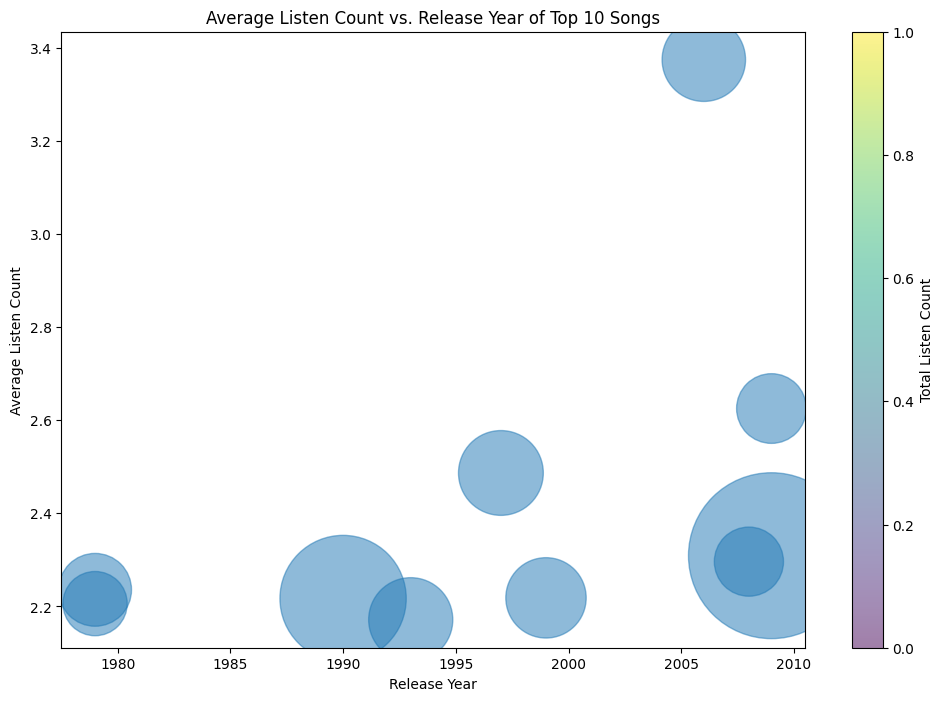

In [48]:
# Plotting the TOP 10 SONGS

# X-axis (Release Year): Each point on the x-axis represents the release year of a song.

# Y-axis (Average Listen Count): The y-axis shows the average listen count for each song.

# Point Size: The size of each point is determined by the total listen count of the song.
# Larger points indicate songs that have been listened to more frequently.

# Color: The color of each point also represents the total listen count,
# with darker colors indicating songs with higher total listen counts.

plt.figure(figsize=(12, 8))
plt.scatter(top_10_info['year'], top_10_info['avg_count'], s=top_10_info['sum_count']*10, alpha=0.5, cmap='viridis')
plt.title('Average Listen Count vs. Release Year of Top 10 Songs')
plt.xlabel('Release Year')
plt.ylabel('Average Listen Count')
plt.colorbar(label='Total Listen Count')
plt.show()


# Importing RecSys algos
TODO: maybe put in the beginning

In [49]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162730 sha256=b47ff42177c4f7b490ed68abed90f935ed741a0157c6b4fc1b6780ead5fad11c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [50]:
# Import the necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

## Collaborative-filtering

https://github.com/rctruta/music_recommendation_system/blob/main/music_recommendation_system_final_submission.ipynb

## Preparing the data

In [51]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (1, 5)
reader = Reader(rating_scale = (1, 5))
# Loading the dataset
 # Take only "user_id","song_id", and "listen_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'listen_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.2, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

KeyError: "['song_id'] not in index"

### Similarity/Neighborhood-based

In [ ]:
# Build the default user-user-similarity model

sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, Verbose=False, random_state=1)
# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

precision_recall_at_k(sim_user_user, 10, 1)
precision_recall_at_k(sim_user_user, 20, 1)
precision_recall_at_k(sim_user_user, 30, 1)
precision_recall_at_k(sim_user_user, 40, 1)

#### **Tune the baseline user-user-similarity model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters.
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
param_grid = {'k': [10, 20, 30, 40, 50, 60], 'min_k': [9, 12, 15, 18, 21],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs_user_user = RandomizedSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs_user_user.fit(data)
# Display the best parameters
display_best_params(gs_user_user)

- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **40**,
  - `min_k`: **15**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': True}**.


In [ ]:
# Train the best model found in the above grid search
# Using the optimal similarity measure for user-user based collaborative filtering.
sim_options = {'name': 'pearson_baseline',
               'k': 40,
               'min_k': 15,
               'user_based': [True]}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)
precision_recall_at_k(sim_user_user_optimized, 10, 1)
precision_recall_at_k(sim_user_user_optimized, 20, 1)
precision_recall_at_k(sim_user_user_optimized, 30, 1)
precision_recall_at_k(sim_user_user_optimized, 40, 1)
precision_recall_at_k(sim_user_user_optimized, 50, 1)

### **Build a baseline item-item-similarity model**

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Compute and display the metrics
precision_recall_at_k(sim_item_item, 10, 1)
precision_recall_at_k(sim_item_item, 20, 1)
precision_recall_at_k(sim_item_item, 30, 1)
precision_recall_at_k(sim_item_item, 40, 1)


#### **Tune the baseline item-item-similarity model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters.
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40, 50, 60],
              'min_k': [9, 12, 15, 18, 21],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs_item_item = RandomizedSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data

gs_item_item.fit(data)
# Display the RMSE and the combination of parameters that gave the best RMSE score
display_best_params(gs_item_item)

- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **30**,
  - `min_k`: **9**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': False}**.

In [ ]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'k': 30,
               'min_k': 9,
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Compute and display the metrics

precision_recall_at_k(sim_item_item_optimized, 10, 1)
precision_recall_at_k(sim_item_item_optimized, 20, 1)
precision_recall_at_k(sim_item_item_optimized, 30, 1)
precision_recall_at_k(sim_item_item_optimized, 40, 1)

### Model-Based Collaborative Filtering - Matrix Factorization

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Compute and display the metrics
precision_recall_at_k(svd, 10, 1)
precision_recall_at_k(svd, 20, 1)
precision_recall_at_k(svd, 30, 1)
precision_recall_at_k(svd, 40, 1)

#### **Tune the baseline SVD model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters.
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30, 40, 50, 60],
              'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6, 0.8]}

# Perform a 3-fold grid search cross-validation
gs_svd = RandomizedSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_svd.fit(data)

display_best_params(gs_svd)


- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_epochs`: **60**,
  - `lr_all`: **0.01**, and
  - `reg_all`: **0.2**.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters

svd_optimized = SVD(n_epochs=60, lr_all=0.001, reg_all=0.2, random_state=1)

# Train the algorithm on the train set

svd_optimized = svd_optimized.fit(trainset)
# Compute and display the metrics
precision_recall_at_k(svd_optimized, 10, 1)
precision_recall_at_k(svd_optimized, 20, 1)
precision_recall_at_k(svd_optimized, 30, 1)
precision_recall_at_k(svd_optimized, 40, 1)

## Cluster-based

### Build a baseline Cluster-Based model

In [ ]:
# Make baseline clustering model
coCluster = CoClustering(random_state=1)
# Training the algorithm on the train set
coCluster.fit(trainset)

# # Compute and display the metrics
precision_recall_at_k(coCluster, 10, 1)
precision_recall_at_k(coCluster, 20, 1)
precision_recall_at_k(coCluster, 30, 1)
precision_recall_at_k(coCluster, 40, 1)

#### **Tune the baseline Cluster-Based model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters.
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [4, 5, 6, 7, 8, 9],
              'n_cltr_i': [4, 5, 6, 7, 8, 9],
              'n_epochs': [10, 20, 30, 40, 50]}
# Perform a 3-fold grid search cross-validation
gs_cocluster = RandomizedSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
gs_cocluster.fit(data)
display_best_params(gs_cocluster)
# Find the best RMSE score
#print(round(gs.best_score['rmse'], 3))
# Extract the combination of parameters that gave the best RMSE score
#print(gs.best_params['rmse'])

- The `Grid Search Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_cltr_u`: **4**,
  - `n_cltr_i`: **5**, and  
  - `n_epochs`: **10**.


In [ ]:
# Train the tuned Coclustering algorithm
coCluster_optimized = CoClustering(n_cltr_u=4, n_cltr_i=5, n_epochs=10, random_state=1)
coCluster_optimized.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(coCluster_optimized, 10, 1)
precision_recall_at_k(coCluster_optimized, 20, 1)
precision_recall_at_k(coCluster_optimized, 30, 1)
precision_recall_at_k(coCluster_optimized, 40, 1)

## Content-based

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Make a copy of the df_final, on which we will perform further analysis and transformations.
df_content = df_final

In [ ]:
# Concatenate the title, release and artist_name columns to create a new column, text.
df_content['text'] = df_content[['title', 'release', 'artist_name']].agg(' '.join, axis=1)


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_content = df_content[['user_id', 'song_id', 'listen_count', 'title', 'text']].reset_index(drop=True)
# Drop the duplicates from the title column
df_content = df_content.drop_duplicates('title')
# Set the title column as the index
df_content = df_content.set_index('title')
df_content.head()


In [ ]:
# Importing the necessary libraries for working with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
# Function for tokenizing the text
def tokenize(text):
    '''
    A function that tokenizes a given text.
    A token is a word that is not a stop word.
    Params:
        text: text to be tokenized
    Returns:
        A list of the tokens obtained from the text.
    '''
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create the tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the vectorizer on the text column, convert the output into an array
song_tfidf = tfidf.fit_transform(df_content['text'].values).toarray()

In [ ]:
pd.DataFrame(song_tfidf).head()

In [ ]:
# Compute the cosine similarity for the tfidf
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Display the similar_songs array
similar_songs

#### **Making recommendations based on the title of a song**

In [ ]:
# Function that makes n recommendations to a given title of a song.
def recommendations(df, title, similarity_matrix, n=10):
    '''
    A function that returns a list of songs (titles) similar to a given one.
    Params:
        df: dataframe with the data
        title: the title of the song for which we are computing similar songs
        similarity_matrix: the cosine similarity matrix for all song-song
        n: the upper limit number of similar songs
    Returns:
        A list of songs ids, when the title exists in the database.
        A message, otherwise.
    '''
    recommended_songs = []

    # Get the index of the song that matches the title
    df_idx = pd.Series(df.index)
    if title not in df.index:
        return print(clr.S+'We appologize, we cannot find {} in our database, and we are unable to make recommendations!'.format(title)+clr.E)
    idx = df_idx[df_idx == title].index[0]

    # Create a Series with the similarity scores in descending order
    sim_scores = pd.Series(similarity_matrix[idx]).sort_values(ascending = False)

    # Filter the scores that are equal to 0.0.
    # We do not want to recommend a song that has a simmilarity score of 0.0.
    # An improvement would be to set a threshold of what constitues a recommendable song.
    sim_scores = sim_scores[sim_scores !=0]
    # Getting the indexes of the 10 most similar songs
    top_n_index = list(sim_scores.iloc[1:n+1].index)

    # Populating the list of recommendations with the titles of the best 10 matching songs
    for i in top_n_index:
        recommended_songs.append(list(df.index)[i])

    return recommended_songs

# Evaluation metrics

https://github.com/rctruta/music_recommendation_system/blob/main/music_recommendation_system_final_submission.ipynb

# Showing predictions

# Comparing the models

# Final thoughts